# Getting Started with DeepOrigins
---
*How to go from simple **matrix multiplication** and basic **backpropagation** to ResNets, Cyclical Learning Rate Policies and breaking the **State-of-the-Art in Imagenet**, all from scratch!*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-Started-with-DeepOrigins" data-toc-modified-id="Getting-Started-with-DeepOrigins-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting Started with DeepOrigins</a></span></li><li><span><a href="#Python-Data-Model" data-toc-modified-id="Python-Data-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Python Data Model</a></span><ul class="toc-item"><li><span><a href="#__new__-&amp;__init__" data-toc-modified-id="__new__-&amp;__init__-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>__new__</code> &amp;<code>__init__</code></a></span></li><li><span><a href="#__repr__-&amp;-__str__" data-toc-modified-id="__repr__-&amp;-__str__-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>__repr__</code> &amp; <code>__str__</code></a></span></li><li><span><a href="#__len__-&amp;-__getitem__" data-toc-modified-id="__len__-&amp;-__getitem__-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>__len__</code> &amp; <code>__getitem__</code></a></span></li><li><span><a href="#__call__" data-toc-modified-id="__call__-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><code>__call__</code></a></span></li><li><span><a href="#__enter__,-__exit__-&amp;-__del__" data-toc-modified-id="__enter__,-__exit__-&amp;-__del__-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><code>__enter__</code>, <code>__exit__</code> &amp; <code>__del__</code></a></span></li></ul></li><li><span><a href="#Python-Decorators" data-toc-modified-id="Python-Decorators-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Python Decorators</a></span></li><li><span><a href="#Callbacks-in-Python" data-toc-modified-id="Callbacks-in-Python-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Callbacks in Python</a></span><ul class="toc-item"><li><span><a href="#Events-&amp;-Callbacks" data-toc-modified-id="Events-&amp;-Callbacks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Events &amp; Callbacks</a></span></li><li><span><a href="#Custom-Callback" data-toc-modified-id="Custom-Callback-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Custom Callback</a></span></li><li><span><a href="#Lambdas,-Partials-&amp;-Inner-Functions" data-toc-modified-id="Lambdas,-Partials-&amp;-Inner-Functions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lambdas, Partials &amp; Inner Functions</a></span></li><li><span><a href="#Callbacks-as-Callable-Classes" data-toc-modified-id="Callbacks-as-Callable-Classes-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Callbacks as Callable Classes</a></span></li><li><span><a href="#Callback-arguments-with-*args-&amp;-**kwargs" data-toc-modified-id="Callback-arguments-with-*args-&amp;-**kwargs-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Callback arguments with <code>*args</code> &amp; <code>**kwargs</code></a></span></li><li><span><a href="#Callbacks-affecting-behaviour" data-toc-modified-id="Callbacks-affecting-behaviour-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Callbacks affecting behaviour</a></span></li></ul></li><li><span><a href="#Statistical-Measures" data-toc-modified-id="Statistical-Measures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Statistical Measures</a></span><ul class="toc-item"><li><span><a href="#Measures-of-Spread" data-toc-modified-id="Measures-of-Spread-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Measures of Spread</a></span></li><li><span><a href="#Measures-of-Correlation" data-toc-modified-id="Measures-of-Correlation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Measures of Correlation</a></span></li></ul></li><li><span><a href="#Softmax" data-toc-modified-id="Softmax-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Softmax</a></span></li></ul></div>

# Python Data Model
---
**Python abstracts and represents all data as objects in compliance with the Von Neumann model: [Python Data Model](https://docs.python.org/3/reference/datamodel.html#object.__init__)**

Python classes can be extended with special behaviour using the `__dunder__` or data model methods such as `__init__`. We can overload operators in Python by using the specific `__dunder__` methods, each with a pre-defined name. For example, defining a `__add__` method in our class will add two objects of the class whenever a plus sign is encountered. 

Such *special* methods are also invoked by certain special syntax such as subscription (`arr[i]`) or during certain special context such as initialising a new object (`__init__`) or calling `len` on a container object such as a list.

We shall see some of the regularly used (by me) special methods below. For a complete and exhaustive guide please follow the documentation link given above. Let's begin!

## `__new__` &`__init__`

Now, we will play with a running example to demostrate these *magic* methods. We will design a `Polynomial` class to abstract the polynomials of math.

Many of you will be familiar with `__init__`. Whereas `__init__` is used to initialize the object, `__new__` is used to create the object itself, which can then be initialized. That's why `__init__` takes `self` as the first parameter but `__new__` takes `cls`. When `__new__` is called, the `self` instance doesn't exist yet. So the class is passed to `__new__` and then it creates a `self` instance to be used by `__init__`. 

Here, we will use them to construct only quadratic (2-degree) polynomials: 

In [42]:
class Polynomial:
    '''An abstraction of the polynomial'''
    
    def __new__(cls, *coefficients):
        '''An arbitary constraint for demonstration'''
        if len(coefficients) == 3:
            return super().__new__(cls)
        else:
            raise Exception("Polynomial must be quadratic with 3 non-zero coefficients")
        
    def __init__(self, *coefficients):
        self.coeff = [c for c in coefficients]

In [43]:
y = Polynomial(1,2,3)
y.coeff

[1, 2, 3]

In [44]:
y = Polynomial(2,5)

Exception: Polynomial must be quadratic with 3 non-zero coefficients

## `__repr__` & `__str__`

Let's make our `Polynomial` objects look like real polynomials.

Python gives us `__repr__` and `__str__` to represent the objects of our class to the outside world. So, what's the difference between the two:
* `__repr__`:  To design the "official" string representation which should, if possible, look like the valid Python expression used to create this object
* `__str__`: To design the "informal" string representation which prints pretty and looks closer to how we *think* about the object

In [45]:
class Polynomial:
    '''An abstraction of the polynomial'''
            
    def __init__(self, *coefficients):
        self.coeff = [c for c in coefficients]
    
    def __repr__(self):
        return f"Polynomial({self.coeff})"
    
    def __str__(self):
        return ' + '.join([f'{c}x^{i}'
                           for i,c in enumerate(self.coeff)])

In [46]:
y = Polynomial(1,2,3)
y

Polynomial([1, 2, 3])

In [47]:
print(y)

1x^0 + 2x^1 + 3x^2


## `__len__` & `__getitem__`

The `__len__` and `__getitem__` method along with some others (`__setitem__`, `__iter__`, `__contains__`) can be used to emulate container objects like tuples or lists i.e. sequences or even mappings like dictionaries.

Here, we will use these two *magic* methods to close the gap between our `Polynomial` class abstraction and the real math-y polynomials:
* Whenever someone calls the `len()` function on our `Polynomial` objects, we should return the nearest interpretation for the "length" of a polynomial. This must be the degree of the polynomial (highest power of x with a non-zero coefficient e.g. degree of $3x^{2} + 2x + 1$ is 2).
* Whenever someone tries to index into our polynomial object using `polynomial[i]` we simply return the coefficient  of that particular term e.g. 0th item of $3x^{2} + 2x + 1$ is 1, 2nd item of $3x^{2} + 2x + 1$ is 3. 

In [48]:
class Polynomial:
    '''An abstraction of the polynomial'''
            
    def __init__(self, *coefficients):
        self.coeff = [c for c in coefficients]
    
    def __len__(self):
        '''Degree of a polynomial'''
        return len(self.coeff)
    
    def __getitem__(self, i):
        return self.coeff[i]

In [49]:
y = Polynomial(1,2,3)

In [50]:
len(y)

3

In [51]:
y[2], y[1], y[0]

(3, 2, 1)

## `__call__`

Let's make our `Polynomial` objects do some real work. So what can we do with real polynomials like:

\begin{equation*}
y = 3x^{2} + 2x + 1
\end{equation*}

Well, we can compute the value of the polynomial at a given x like so:

\begin{align}
y(1) = 6 \\ 
y(2) = 17 \\
y(3) = 34 \\
\end{align}


Python has the `__call__` method to implement this behaviour. In general, defining a `__call__` method in a class makes it a *Callable* class. Then we can use the objects of this class just like we use functions e.g. f(x) -> obj(x). I find this really useful and really cool!  

In [119]:
class Polynomial:
    '''An abstraction of the polynomial'''
            
    def __init__(self, *coefficients):
        self.coeff = [c for c in coefficients]
    
    def __call__(self, x):
        return sum([c*(x**i) for i, c in enumerate(self.coeff)])

In [120]:
y = Polynomial(1,2,3)

In [121]:
y(1)

6

In [122]:
y(2)

17

In [123]:
y(3)

34

## `__enter__`, `__exit__` & `__del__`

Now, let's demonstrate the usage of `__enter__`, `__exit__` & `__del__` by implementing a random polynomial generator which works only within a context. 

When we enter the context using `with` we get either one of a linear, quadratic or cubic polynomial with random coefficients. We compute the value of the polynomial at x and optionally do some more operations in the body. When we exit the `with` context, `del` is automatically called for clean up. And next time we get a fresh new polynomial. 

In [161]:
import random

In [162]:
class RandomPolynomial():
    ''' Working within the context of a randomly defined polynomial'''
    
    def __enter__(self):
        degree = random.randint(1,3)
        coeffs = random.sample(range(1,9), k=degree)
        self.random_polynomial = Polynomial(*coeffs) 
        print(f"Entering with random coefficients: {coeffs}")
        return self.random_polynomial
    
    def __exit__(self, *args):
        '''__del__ is automatically called'''
        print("Exiting by cleaning up")
    
    def __del__(self):
        del(self.random_polynomial)
        print("Cleanup Complete")

In [168]:
with RandomPolynomial() as y:
    print(y(3))

Entering with random coefficients: [7, 5]
22
Exiting by cleaning up
Cleanup Complete


# Python Decorators
---

**TODO:**

# Callbacks in Python
---

## Events & Callbacks

In [8]:
import ipywidgets as widgets

We create a graphical button using the ipywidgets.Button

In [9]:
b = widgets.Button(description="Click Here")
b

Button(description='Click Here', style=ButtonStyle())

However, it won't do anything no matter how many times you click on it. But something does happen when you click on it. The developers of the ipywidgets library have defined an event called `on_click()` which is called everytime the button registers a mouse click. If we, the users of this library, want something to happen when the button is clicked we can indeed open the source code of the library and manually edit the `on_click()` function. But that's gonna be a mess, a disaster waiting to happen. But the developers of ipywidgets created this library for users to create their own buttons with their own behaviours. Afterall we could actually create our own button, but how do we define it's behaviour?  

The ipywidgets' developers simply want us to write a function `f()` that implements our custom behaviour and pass the function `f()` to the `on_click()` function. The developers have promised us that `on_click()` will call our function `f()` back. That's a callback!

In [10]:
def f(o): print("Custom Click Click!")

In [11]:
b.on_click(f)
b

Button(description='Click Here', style=ButtonStyle())

Custom Click Click!


## Custom Callback

In [1]:
from time import sleep

In [24]:
def factorial(n, cb=None):
    sleep(1);
    if cb: cb(n)
    if n==1: return 1
    return n*factorial(n-1, cb)

In [25]:
factorial(4)

24

In [26]:
def print_callback(n):
    print(f"factorial({n})")

In [27]:
factorial(4, cb=print_callback)

factorial(4)
factorial(3)
factorial(2)
factorial(1)


24

## Lambdas, Partials & Inner Functions

**Using Lambda functions for single use function definition**

In [28]:
factorial(4, cb=lambda x: print(f"factorial({x})"))

factorial(4)
factorial(3)
factorial(2)
factorial(1)


24

**Using Partial functions**

In [32]:
from functools import partial

In [35]:
def print_callback(n, msg=''):
    print(msg + f"factorial({n})")

In [36]:
factorial(4, cb=partial(print_callback, msg="Calling: "))

Calling: factorial(4)
Calling: factorial(3)
Calling: factorial(2)
Calling: factorial(1)


24

**Using Lambda functions as on-the-fly generated functions**

In [29]:
def make_print_callback(msg=''):
    return lambda x: print(msg + f"factorial({x})")

In [31]:
factorial(4, cb=make_print_callback(msg="Calling: "))

Calling: factorial(4)
Calling: factorial(3)
Calling: factorial(2)
Calling: factorial(1)


24

**Using Inner functions**

In [37]:
def make_print_callback(msg=''):
    def _inner(n): print(msg + f"factorial({n})")
    return _inner

In [40]:
factorial(4, cb=make_print_callback(msg="Calling: "))

Calling: factorial(4)
Calling: factorial(3)
Calling: factorial(2)
Calling: factorial(1)


24

In [39]:
factorial(4, cb=make_print_callback(msg="Recursing: "))

Recursing: factorial(4)
Recursing: factorial(3)
Recursing: factorial(2)
Recursing: factorial(1)


24

## Callbacks as Callable Classes

In [41]:
class PrintCallback():
    '''Prints the parameter passed during along with an optional message'''
    
    def __init__(self, msg=''): self.msg = msg
    
    def __call__(self, n): print(self.msg + f"{n}")

In [42]:
cb = PrintCallback("Recursive Callling: ")
factorial(4, cb)

Recursive Callling: 4
Recursive Callling: 3
Recursive Callling: 2
Recursive Callling: 1


24

## Callback arguments with `*args` & `**kwargs`

In [72]:
def fibonacci(n, cb=None):
    if cb and hasattr(cb, 'before'): cb.before(n)
    sleep(0.1)
    if n<=1: return n
    if cb and hasattr(cb, 'after'):  cb.after(n)
    return fibonacci(n-1, cb)+fibonacci(n-2, cb)

In [73]:
fibonacci(4)

3

In [74]:
class StackCallback:
    '''Printing the recursive call stack'''
    
    def __init__(self, msg=''): self.msg = msg
    def before(self, n): print(self.msg + f"Calling: fibonacci({n})")
    def after(self, n): print(self.msg + f"Recursing: fibonacci({n-1}) & fibonacci({n-2})")

In [75]:
cb = StackCallback()

In [76]:
fibonacci(4, cb)

Calling: fibonacci(4)
Recursing: fibonacci(3) & fibonacci(2)
Calling: fibonacci(3)
Recursing: fibonacci(2) & fibonacci(1)
Calling: fibonacci(2)
Recursing: fibonacci(1) & fibonacci(0)
Calling: fibonacci(1)
Calling: fibonacci(0)
Calling: fibonacci(1)
Calling: fibonacci(2)
Recursing: fibonacci(1) & fibonacci(0)
Calling: fibonacci(1)
Calling: fibonacci(0)


3

In [77]:
fibonacci(3, cb)

Calling: fibonacci(3)
Recursing: fibonacci(2) & fibonacci(1)
Calling: fibonacci(2)
Recursing: fibonacci(1) & fibonacci(0)
Calling: fibonacci(1)
Calling: fibonacci(0)
Calling: fibonacci(1)


2

## Callbacks affecting behaviour

We find that functions are being called more than once on the same parameter which is a waste of computation. Let's use callbacks to maintain a cache of commonly computed values. 

In [103]:
def fibonacci(n, cb=None):
    if cb and hasattr(cb, 'cached'):
        if cb.cached(n):
            return cb.cached(n)
    if cb and hasattr(cb, 'before'): cb.before(n)
    sleep(0.1)
    if n<=1: return n
    if cb and hasattr(cb, 'after'):  cb.after(n)
    return fibonacci(n-1, cb)+fibonacci(n-2, cb)

In [104]:
class CacheCallback(StackCallback):
    '''Maintains a cache of commnonly called values'''
    
    def __init__(self, cache, msg=''): self.cache, self.msg = cache, msg
    def cached(self, n): return self.cache.get(n, None)        

In [105]:
fibonacci_cache = {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5}
cb = CacheCallback(fibonacci_cache)

In [108]:
fibonacci(6, cb)

Calling: fibonacci(6)
Recursing: fibonacci(5) & fibonacci(4)


8

In [109]:
fibonacci(7, cb)

Calling: fibonacci(7)
Recursing: fibonacci(6) & fibonacci(5)
Calling: fibonacci(6)
Recursing: fibonacci(5) & fibonacci(4)


13

# Statistical Measures
---

In [111]:
import torch
import matplotlib.pyplot as plt

In [146]:
# taking advantage of python's dynamic nature to plot tensors
torch.Tensor.ndim = property(lambda x: len(x.shape))

## Measures of Spread

In [124]:
x = torch.tensor([1.,2.,3.,4.,15.])

In [120]:
x, y

(tensor([ 1.,  2.,  3.,  4., 50.]),
 tensor([ 1.7020,  2.2564,  3.3380,  4.7449, 50.4187]))

**Measure of Central Tendency: What's the centre of the values?**

In [126]:
m = x.mean()
m

tensor(5.)

**Measure of Spread: How far are the values spread out?**

This won't work since the negative distances from the centre cancel out the positive distances from the centre

In [127]:
(x-m).mean()

tensor(0.)

We can still make it work. Here are three ways of doing so:

**Mean Absolute Deviation: Absolute distance of all the values from the mean or typical value**

In [135]:
(x-m).abs().mean()

tensor(4.)

**Variance: Square the variation in distances of all the values from the mean or typical value**

In [136]:
(x-m).pow(2).mean()

tensor(26.)

But this is goes on a different scale since everything is squared. And hence:

**Standard Deviation: Take the square root of variance to scale it back to the original scale**

In [137]:
(x-m).pow(2).mean().sqrt()

tensor(5.0990)

However, Standard Deviation (STD) does not match Mean Absolute Deviation (MAD) exactly. The reason is simple: STD is more sensitive to outliers than MAD, since values are squared in STD. This makes large values even larger and small values even smaller. In short, STD overplays the outliers in our data. Hence, it's better to use MAD sometimes.

In [133]:
(x-m).abs().mean()

tensor(4.)

**Efficiently computing Variance:**

$$\operatorname{E}\left[X^2 \right] - \operatorname{E}[X]^2$$

In [138]:
(x*x).mean() - m*m

tensor(26.)

## Measures of Correlation

*Let's try to measure similarity between two sets of data*

In [261]:
# original dataset
x = torch.randn(100)

**1. Exactly the same datset: No added randomness**

In [262]:
randomness = 0.

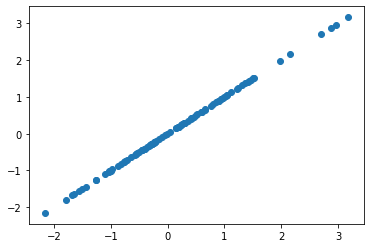

In [263]:
# same as x but with added randomness
y = x + torch.rand_like(x)*randomness
plt.scatter(x,y)

**Covariance: How much do x and y vary?**

In [264]:
cov = ((x - x.mean()) * (y - y.mean())).mean()
cov

tensor(1.1100)

**Pearson Correlation Coefficient: How much are x and y correlated?**

In [265]:
p_corr = cov / (x.std() * y.std())
p_corr

tensor(0.9900)

**2. Slightly different dataset: Some added randomness**

In [266]:
randomness = 3.

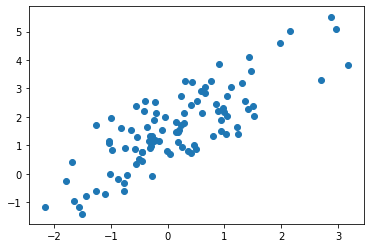

In [267]:
y = x + torch.rand_like(x)*randomness
plt.scatter(x,y)

**Covariance:**

In [268]:
cov = ((x - x.mean()) * (y - y.mean())).mean()
cov

tensor(1.1712)

**Pearson Correlation Coefficient:**

In [269]:
p_corr = cov / (x.std() * y.std())
p_corr

tensor(0.8032)

**3. Very different dataset: Significantly added randomness**

In [270]:
randomness = 10.

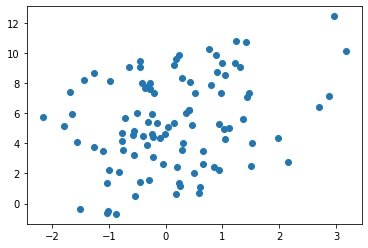

In [271]:
y = x + torch.rand_like(x)*randomness
plt.scatter(x,y)

**Covariance:**

In [272]:
cov = ((x - x.mean()) * (y - y.mean())).mean()
cov

tensor(0.9208)

**Pearson Correlation Coefficient:**

In [273]:
p_corr = cov / (x.std() * y.std())
p_corr

tensor(0.2902)

**4. Exactly opposite dataset:**

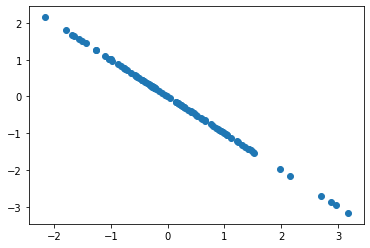

In [274]:
y = -x
plt.scatter(x,y)

**Covariance:**

In [275]:
cov = ((x - x.mean()) * (y - y.mean())).mean()
cov

tensor(-1.1100)

**Pearson Correlation Coefficient:**

In [276]:
p_corr = cov / (x.std() * y.std())
p_corr

tensor(-0.9900)

# Softmax
---

**TODO:**